# Sarter Notebook

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import haversine as hs

ModuleNotFoundError: No module named 'haversine'

## Reading Data

In [349]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")
ordersXproducts = pd.read_csv("ordersXproducts.csv", sep=",")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

In [235]:
# Canviar els noms per tal que sigui consistent en ORIGIN PORT
df_orders["origin_port"] = df_orders["origin_port"].replace(["ATHENAS"], "Athens")
df_orders["origin_port"] = df_orders["origin_port"].replace(["BCN"], "Barcelona")

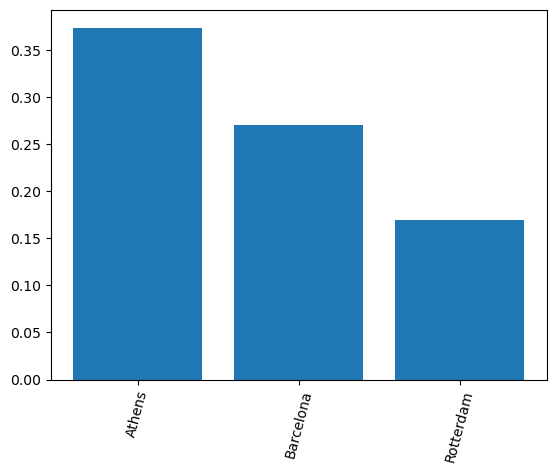

In [190]:
counts = df_orders["late_order"].groupby(df_orders["origin_port"]).value_counts()

ports = df_orders.origin_port.unique()
ports.sort()
lateness_ratio = [[],[]]
for i in range(len(ports)):
    lateness_ratio[0].append(ports[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

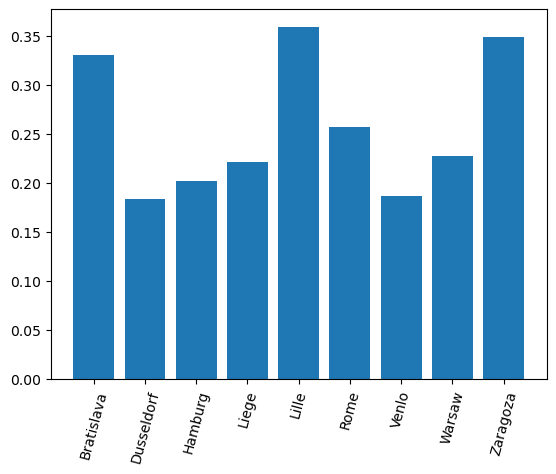

In [191]:
counts = df_orders["late_order"].groupby(df_orders["logistic_hub"]).value_counts()

hubs_a = df_orders.logistic_hub.unique()
hubs = []
for i in hubs_a:
    if type(i) is not float:
        hubs.append(i)

hubs.sort()

lateness_ratio = [[],[]]
for i in range(len(hubs)):
    lateness_ratio[0].append(hubs[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))
    
plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

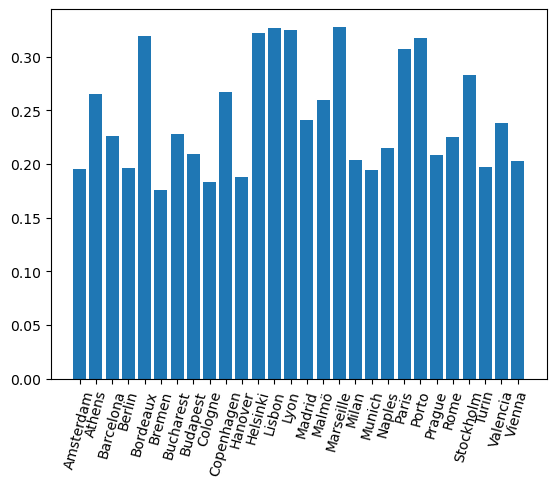

In [189]:
counts = df_orders["late_order"].groupby(df_orders["customer"]).value_counts()

destins = df_orders.customer.unique()
destins.sort()

lateness_ratio = [[],[]]
for i in range(len(destins)):
    lateness_ratio[0].append(destins[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

In [224]:
counts = ordersXproducts["late_order"].groupby(ordersXproducts["material_handling"]).value_counts()

mat = ordersXproducts.material_handling.unique()
mat.sort()

mate = mat[0:6]

[0. 1. 2. 3. 4. 5.]


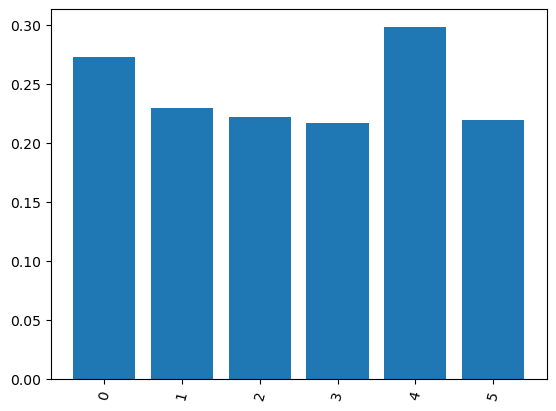

In [225]:

lateness_ratio = [[],[]]
for i in range(len(mate)):
    lateness_ratio[0].append(mate[i])
    lateness_ratio[1].append(counts[i][1]/(counts[i][0] + counts[i][1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

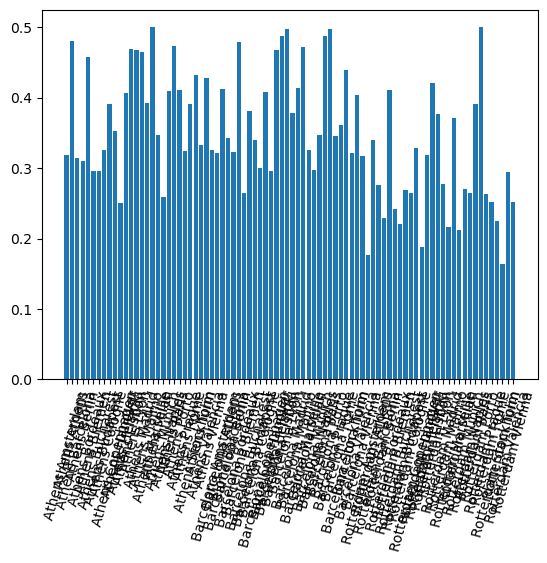

In [238]:
counts = df_orders["late_order"].groupby([df_orders["origin_port"], df_orders["customer"]]).value_counts()
ports = df_orders.origin_port.unique()
customers = df_orders.customer.unique()
ports.sort()
customers.sort()
lateness_ratio = [[],[]]
k = 0
for i in range(len(ports)):
    for j in range(len(customers)):
        lateness_ratio[0].append(ports[i] + " " + customers[j])
        lateness_ratio[1].append(counts[2*k + 1]/(counts[2*k] + counts[2*k + 1]))
        k += 1

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

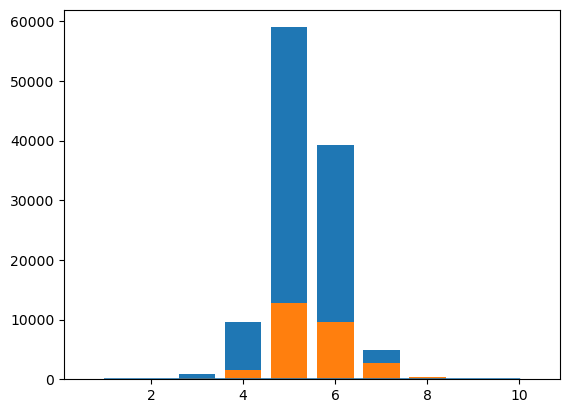

In [338]:
counts = df_orders["units"].groupby(df_orders["units"]).value_counts()
c = df_orders["units"].value_counts()

df_orders2 = df_orders.copy()
df_orders2["late_order"] = df_orders2["late_order"].astype(int)
df_orders2 = df_orders2.drop(df_orders2[df_orders2.late_order < 1].index)

cc = df_orders2["units"].value_counts()

cprima = c.sort_index() # nombre de comandes amb cada nombre d'unitats ordenades
ccprima = cc.sort_index() # nombre de comandes fallides amb cada nombre d'unitats ordenades

k = 1
ccprimaprima = [0]
for i in ccprima.index.values:
    if i < 100*k:
        ccprimaprima[k - 1] += ccprima[i]
    else:
        ccprimaprima.append(ccprima[i])
        k += 1

cprimaprima = [0]
k = 1
for i in cprima.index.values:
    if i < 100*k:
        cprimaprima[k - 1] += cprima[i]
    else:
        cprimaprima.append(cprima[i])
        k += 1

a= []
for j in range(1, 11):
    a.append(j)

plt.bar(a,cprimaprima)
plt.bar(a,ccprimaprima)

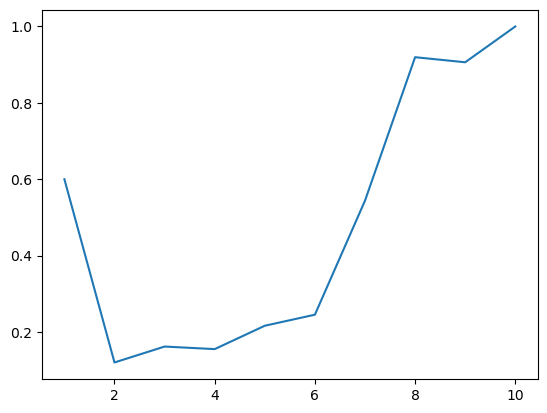

In [339]:
ratios = [[],[]]
for k in range(len(cprimaprima)):
    ratios[0].append(k + 1)
    if (cprimaprima[k] != 0):
        ratios[1].append(ccprimaprima[k]/cprimaprima[k])
    else:
        ratios[1].append(0)
plt.plot(ratios[0], ratios[1])

In [ ]:

units = df_orders.origin_port.unique()
units.sort()
lateness_ratio = [[],[]]
for i in range(len(units)):
    lateness_ratio[0].append(units[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))

plt.plot(lateness_ratio[0], lateness_ratio[1])
plt.show() 

## Dummy Model

In [352]:
from sklearn.dummy import DummyClassifier

X_train = df_orders.drop(['late_order'], axis=1)
y_train = df_orders['late_order']

X_test = df_test

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

pred_proba = dummy_clf.predict_proba(X_test)

## Save Solution
> **Note:** Submited probabilities must be for the **True** cases.

In [ ]:
submission = pd.DataFrame({"order_id": X_test.order_id, "late_order": pred_proba[:,1]})
submission.to_csv("submission_kaggle.csv", index=False)

In [378]:
def read_coor(entry):
    c = entry.split()
    d = c[0].split('(')
    f = d[1].split(',')
    e = c[1].split(')')
    return (float(f[0]), float(e[0]))

def calculate_distance(city1name, city2name, cities):
    coor1 = read_coor(cities[city1name])
    coor2 = read_coor(cities[city2name])
    hs.haversine(coor1, coor2)
    return distance

d = df_dists.to_numpy()
cities = {}
for a in d:
    if a[0] not in cities:
        cities[a[0]] = a[2]
    if a[1] not in cities:
        cities[a[1]] = a[3]

calculate_distance('Dusseldorf', 'Athens', cities)

['51.2254018', '']
['6.7763137', '']
['37.9839412', '']
['23.7283052', '']


NameError: name 'hs' is not defined